# Projeto 3 - Ciência dos Dados

#### Stephanie Wertheimer, Thomas Pilnik e Victor Sznifer

Temos duas bases de dados: uma que fala sobre medições da quantidade de E. Coli nas praias de Chicago, e outra que mede diferentes características físicas da água. Nosso objetivo é buscar uma relação entre a proliferação de bactérias e os parâmetros utlizados para analisar a água. Faremos isso usando um modelo de regressão linear. Em seguida, faremos uma regressão logística que medirá a probabilidade de uma praia ser ou não própria para banho (fator regulado, por entre outros fatores, pela quantidade de E. Coli na água) de acordo com suas características físicas. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Thomas Pilnik\Ciência dos Dados\Projeto3


In [3]:
lab = pd.read_csv('Beach_Lab_Data.csv', sep=',')

In [4]:
lab.columns = ["DNATestID", "Timestamp", "Beach", "DNA1","DNA2", "DNAMean", "CultureTestID","Sample1TimeStamp","Sample1Reading","Sample2Reading","ReadingMean","CultureNote","SampleInterval","Sample2TimeStamp","Latitude","Longitude","Location"]

In [10]:
lab = pd.DataFrame(lab.loc[:, ["DNATestID", "Beach", "DNAMean","ReadingMean","Sample1TimeStamp"]])

lab=lab.drop(lab[lab.Beach == 'Margaret T Burroughs'].index)
lab=lab.drop(lab[lab.Beach == 'Margaret T Burroughs'].index)
lab=lab.drop(lab[lab.Beach == 'South Shore'].index)
lab=lab.drop(lab[lab.Beach == '12th Street'].index)
lab=lab.drop(lab[lab.Beach == 'North Avenue'].index)
lab=lab.drop(lab[lab.Beach == 'Humboldt'].index)

lab['Sample1TimeStamp']=pd.to_datetime(lab.Sample1TimeStamp).dt.date

lab.head()


,DNATestID,Beach,DNAMean,ReadingMean,Sample1TimeStamp
0,NaN,NaN,NaN,239.3,2013-08-15
2,NaN,Hartigan,NaN,69.0,2010-06-02
5,NaN,Marion Mahony Griffin,NaN,7.1,2015-08-13
7,NaN,Marion Mahony Griffin,NaN,57.8,2007-08-17
8,NaN,Hartigan,NaN,10.8,2015-09-04


In [8]:
water = pd.read_csv('Beach_Water_Quality_-_Automated_Sensors.csv', sep=',')

water.columns = ["Beach", "Timestamp", "WtrTemperature", "Turbidity","TransducerDepth", "WaveHeight", "WavePeriod", "BatteryLife","TimestampLabel","ID"]


In [9]:
water=pd.DataFrame(water.loc[:, ["Beach", "WtrTemperature", "Turbidity","TransducerDepth", "WaveHeight", "WavePeriod", "TimestampLabel"]])
water=water.drop(water[water.Beach == 'Osterman Beach'].index)

water['Nível']='Médio'
water.loc[(water.Beach == "Montrose Beach"), "Nível"] = "Montrose"
water.loc[(water.Beach == "Calumet Beach"), "Nível"] = "Calumet"
water.loc[(water.Beach == "Ohio Street Beach"), "Nível"] = "Ohio Street"
water.loc[(water.Beach == "Rainbow Beach"), "Nível"] = "Rainbow"
water.loc[(water.Beach == "63rd Street Beach"), "Nível"] = "63rd Street"

del water['Beach']

water['TimestampLabel']=pd.to_datetime(water.TimestampLabel).dt.date

water.head()


,WtrTemperature,Turbidity,TransducerDepth,WaveHeight,WavePeriod,TimestampLabel,Nível
0,20.3,1.18,0.891,0.080,3.0,2013-08-30,Montrose
1,14.4,1.23,NaN,0.111,4.0,2016-05-26,Ohio Street
2,23.2,3.63,1.201,0.174,6.0,2013-09-03,Calumet
3,16.2,1.26,1.514,0.147,4.0,2014-05-28,Calumet
4,14.4,3.36,1.388,0.298,4.0,2014-05-28,Montrose


In [ ]:
joined = lab.set_index('Beach').join(water.set_index('Nível'), how='inner', lsuffix='lab', rsuffix='_water')
joined


In [19]:
new_df = pd.merge(lab, water,  how='inner', left_on=['Beach','Sample1TimeStamp'], right_on = ['Nível','TimestampLabel'])

new_df.head()

,DNATestID,Beach,DNAMean,ReadingMean,Sample1TimeStamp,WtrTemperature,Turbidity,TransducerDepth,WaveHeight,WavePeriod,TimestampLabel,Nível
0,983.0,Rainbow,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainbow
1,1070.0,Rainbow,26.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainbow
2,1631.0,Rainbow,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainbow
3,1567.0,Rainbow,230.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainbow
4,1408.0,Rainbow,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainbow


In [ ]:
lab.Sample1TimeStamp.value_counts()

In [ ]:
water.TimestampLabel.value_counts()

[0, 1000, 8, 30]

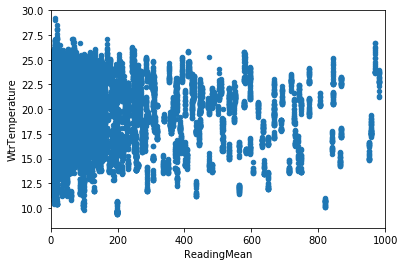

In [25]:
#Seleciona o ano de 2010 e remove os NaNs
new_df.dropna()


#Plota o gráfico de dispersão
new_df.plot.scatter('ReadingMean','WtrTemperature')
plt.axis([0,1000,8,30])

-99999.992    300
 0.107        152
 0.126        150
 0.110        148
 0.108        144
 0.121        143
 0.109        141
 0.127        139
 0.105        139
 0.104        135
 0.103        135
 0.102        132
 0.100        132
 0.088        131
 0.129        131
 0.130        131
 0.094        130
 0.115        129
 0.114        127
 0.119        127
 0.112        127
 0.133        124
 0.092        124
 0.098        123
 0.125        122
 0.113        122
 0.106        122
 0.122        121
 0.095        120
 0.135        119
             ... 
 0.589          1
 0.552          1
 0.539          1
 0.522          1
 0.025          1
 0.592          1
 0.549          1
 0.502          1
 0.019          1
 0.554          1
 0.461          1
 0.575          1
 0.460          1
 0.464          1
 0.548          1
 0.585          1
 0.042          1
 0.607          1
 0.506          1
 0.550          1
 0.468          1
 0.511          1
 0.601          1
 0.564          1
 0.625    

In [28]:
print("Covariância entre ReadingMean e WaterTemperature:",new_df.ReadingMean.cov(new_df.WtrTemperature))

print("Correlação entre ReadingMean e WaterTemperature:",new_df.ReadingMean.corr(new_df.WtrTemperature))


Covariância entre ReadingMean e WaterTemperature: -73.8015378912
Correlação entre ReadingMean e WaterTemperature: -0.047056310804


In [29]:
# Regressão entre ReadingMean e WaterTemperature com ajuste linear

a = new_df.ReadingMean.cov(new_df.WtrTemperature) / new_df.ReadingMean.var()
b = new_df.WtrTemperature.mean() - a*new_df.ReadingMean.mean()

print('Ajuste linear entre X3 e X4:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

Ajuste linear entre X3 e X4:
Coeficiente linear: 19.4112129038
Coeficiente angular: -0.0003604107792


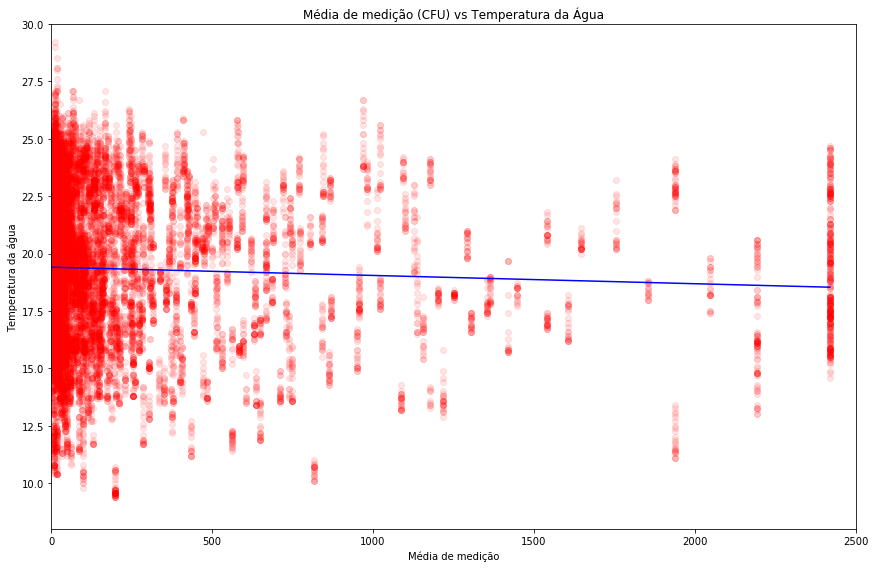

In [39]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(new_df.ReadingMean, new_df.WtrTemperature, c='red', alpha=0.1)
plt.title('Média de medição (CFU) vs Temperatura da Água')
plt.xlabel('Média de medição')
plt.ylabel('Temperatura da água')

plt.plot((new_df.ReadingMean.min(),new_df.ReadingMean.max()), (a*new_df.ReadingMean.min()+b, a*new_df.ReadingMean.max()+b), color='blue')

plt.tight_layout()
plt.axis([0,2500,8,30])
plt.show()

[0, 1000, 8, 30]

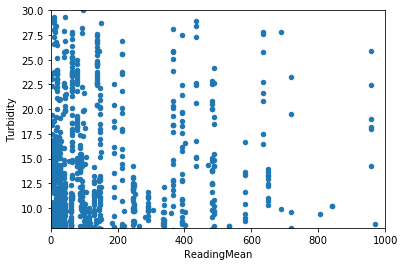

In [40]:
#Plota o gráfico de dispersão
new_df.plot.scatter('ReadingMean','Turbidity')
plt.axis([0,1000,8,30])

In [46]:
print("Covariância entre ReadingMean e Turbidity:",new_df.ReadingMean.cov(new_df.Turbidity))

print("Correlação entre ReadingMean e Turbidity:",new_df.ReadingMean.corr(new_df.Turbidity))


Covariância entre ReadingMean e Turbidity: -281.558386995
Correlação entre ReadingMean e Turbidity: -0.0178108986067


In [47]:
# Regressão entre ReadingMean e WaterTemperature com ajuste linear

a = new_df.ReadingMean.cov(new_df.Turbidity) / new_df.ReadingMean.var()
b = new_df.Turbidity.mean() - a*new_df.ReadingMean.mean()

print('Ajuste linear entre X3 e X4:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

Ajuste linear entre X3 e X4:
Coeficiente linear: 4.82831140016
Coeficiente angular: -0.00137499407935


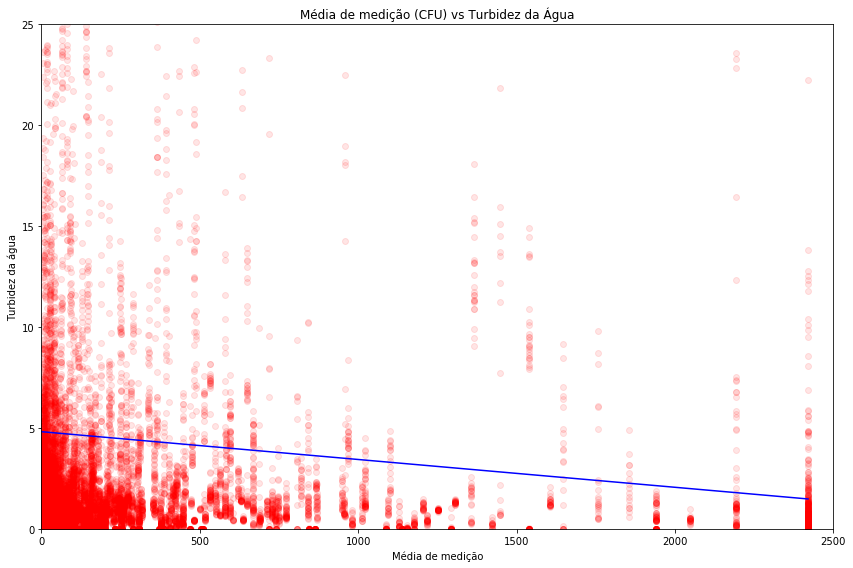

In [51]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(new_df.ReadingMean, new_df.Turbidity, c='red', alpha=0.1)
plt.title('Média de medição (CFU) vs Turbidez da Água')
plt.xlabel('Média de medição')
plt.ylabel('Turbidez da água')

plt.plot((new_df.ReadingMean.min(),new_df.ReadingMean.max()), (a*new_df.ReadingMean.min()+b, a*new_df.ReadingMean.max()+b), color='blue')

plt.tight_layout()
plt.axis([0,2500,0,25])
plt.show()

[0, 2500, 1, 2.5]

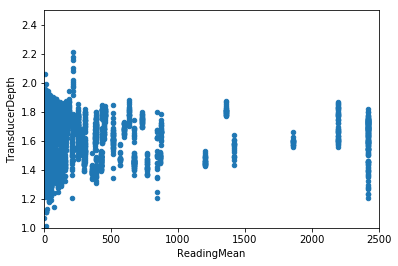

In [54]:
#Plota o gráfico de dispersão
new_df.plot.scatter('ReadingMean','TransducerDepth')
plt.axis([0,2500,1,2.5])

In [55]:
print("Covariância entre ReadingMean e TransducerDepth:",new_df.ReadingMean.cov(new_df.TransducerDepth))

print("Correlação entre ReadingMean e TransducerDepth:",new_df.ReadingMean.corr(new_df.TransducerDepth))


Covariância entre ReadingMean e TransducerDepth: 0.108460289858
Correlação entre ReadingMean e TransducerDepth: 0.00148501267252


In [56]:
# Regressão entre ReadingMean e WaterTemperature com ajuste linear

a = new_df.ReadingMean.cov(new_df.TransducerDepth) / new_df.ReadingMean.var()
b = new_df.TransducerDepth.mean() - a*new_df.ReadingMean.mean()

print('Ajuste linear entre X3 e X4:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

Ajuste linear entre X3 e X4:
Coeficiente linear: 1.61551140455
Coeficiente angular: 5.29667249449e-07


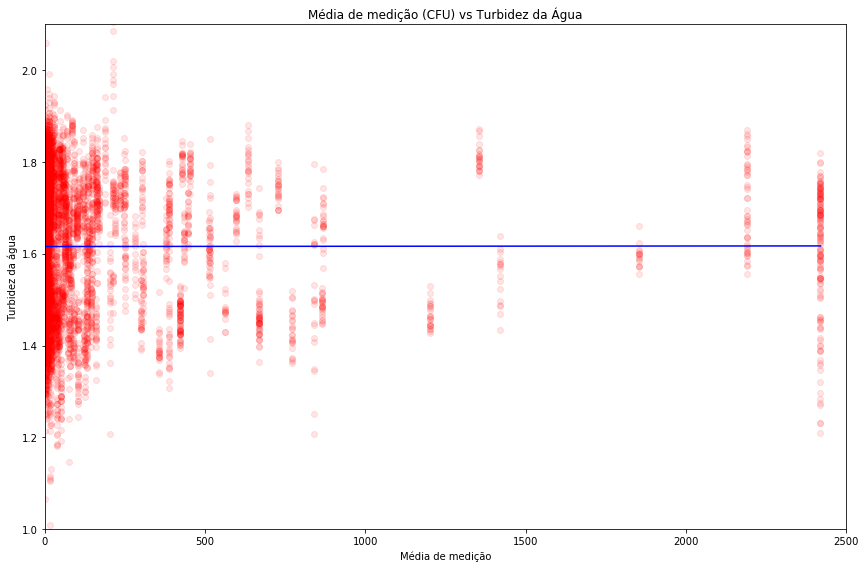

In [60]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(new_df.ReadingMean, new_df.TransducerDepth, c='red', alpha=0.1)
plt.title('Média de medição (CFU) vs Turbidez da Água')
plt.xlabel('Média de medição')
plt.ylabel('Turbidez da água')

plt.plot((new_df.ReadingMean.min(),new_df.ReadingMean.max()), (a*new_df.ReadingMean.min()+b, a*new_df.ReadingMean.max()+b), color='blue')

plt.tight_layout()
plt.axis([0,2500,1,2.1])
plt.show()

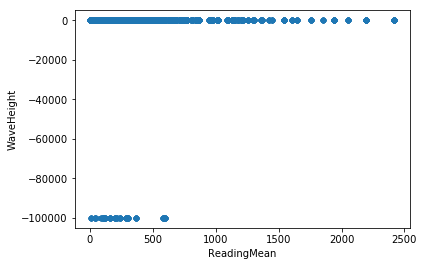

In [62]:
#Plota o gráfico de dispersão
new_df.plot.scatter('ReadingMean','WaveHeight')


In [ ]:
print("Covariância entre ReadingMean e WaveHeight:",new_df.ReadingMean.cov(new_df.WaveHeight))

print("Correlação entre ReadingMean e WaveHeight:",new_df.ReadingMean.corr(new_df.WaveHeight))


In [ ]:
# Regressão entre ReadingMean e WaterTemperature com ajuste linear

a = new_df.ReadingMean.cov(new_df.WaveHeight) / new_df.ReadingMean.var()
b = new_df.WaveHeight.mean() - a*new_df.ReadingMean.mean()

print('Ajuste linear entre X3 e X4:')
print('Coeficiente linear:', b)
print('Coeficiente angular:', a)

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(new_df.ReadingMean, new_df.WaveHeight, c='red', alpha=0.1)
plt.title('Média de medição (CFU) vs Turbidez da Água')
plt.xlabel('Média de medição')
plt.ylabel('Turbidez da água')

plt.plot((new_df.ReadingMean.min(),new_df.ReadingMean.max()), (a*new_df.ReadingMean.min()+b, a*new_df.ReadingMean.max()+b), color='blue')

plt.tight_layout()
plt.axis([0,2500,1,2.1])
plt.show()